In [46]:
# These are the imports that we will need to get started. This list will grow over time as we want to do other things besides just explore...
import pandas as pd
from dfply import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [47]:
# Read in the dataset. This filepath is mine. This is the full dataset. 
train = pd.read_csv("E:\\ProjectData\\ERAU-REU\\Project-Cyber-Security\\NSL-KDD\\KDDTrain+.txt",header=None)
test = pd.read_csv("E:\\ProjectData\\ERAU-REU\\Project-Cyber-Security\\NSL-KDD\\KDDTest+.txt",header=None)
train.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'classification', 'difficulty_level']

test.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'classification', 'difficulty_level']

In [48]:
train >>= mutate(anomaly = case_when([train.classification == 'normal','normal'],
[train.classification != 'normal','anomaly']))

test >>= mutate(anomaly = case_when([test.classification == 'normal','normal'],
[test.classification != 'normal','anomaly']))

In [5]:
train.protocol_type = pd.factorize(train['protocol_type'])[0]
train.service = pd.factorize(train['service'])[0]
train.flag = pd.factorize(train['flag'])[0]
train.classification = pd.factorize(train['classification'])[0]

test.protocol_type = pd.factorize(test['protocol_type'])[0]
test.service = pd.factorize(test['service'])[0]
test.flag = pd.factorize(test['flag'])[0]
test.classification = pd.factorize(test['classification'])[0]

In [7]:
y_train = pd.factorize(train['anomaly'])[0]
x_train = train.drop(['anomaly'],axis=1)

y_test = pd.factorize(test['anomaly'])[0]
x_test = test.drop(['anomaly'],axis=1)

In [44]:
clf = RandomForestClassifier(bootstrap=True,
class_weight=None, 
criterion='gini',
max_depth=6, 
max_features='auto', 
max_leaf_nodes=None,
min_impurity_split=1e-07, 
min_samples_leaf=1,
min_samples_split=2, 
min_weight_fraction_leaf=0.0,
n_estimators=10, 
n_jobs=10, 
oob_score=False, 
random_state=0,
verbose=1, 
warm_start=True)

clf.fit(x_train, y_train)
clf.predict(x_test)
clf.predict_proba(x_test)[0:10]

dtype = pd.CategoricalDtype(['normal', 'anomaly'], ordered=True)
test['preds'] = pd.Categorical.from_codes(codes=clf.predict(x_test),dtype=dtype)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


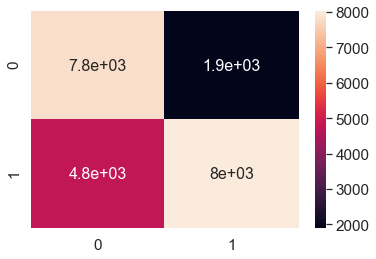

In [45]:
array = confusion_matrix(test['anomaly'], test['preds'], labels=['normal','anomaly'], sample_weight=None, normalize=None)
df_cm = pd.DataFrame(array, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

In [50]:
df_cm

,0,1
0,7819,1892
1,4805,8028
